In [ ]:
import pandas as pd
from scipy import signal
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ptbdb_normal = pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
ptbdb_abnormal = pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)
mitbih_test = pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
mitbih_train = pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)

# MACHINE LEARNING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

# regression logistique

## Anomalie cardiaque

In [ ]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

0.9126160368394123

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     22717
         1.0       0.84      0.39      0.53       701
         2.0       0.64      0.31      0.42      1754
         3.0       0.67      0.20      0.30       194
         4.0       0.95      0.87      0.91      1996

    accuracy                           0.91     27362
   macro avg       0.80      0.55      0.62     27362
weighted avg       0.90      0.91      0.90     27362



In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)
y_oversampled.value_counts()

0.0    67872
4.0     6043
2.0     5482
1.0     2078
3.0      609
Name: 187, dtype: int64


0.0    67872
3.0    67872
2.0    67872
1.0    67872
4.0    67872
Name: 187, dtype: int64

In [ ]:
lr.fit(X_oversampled, y_oversampled)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76     22717
         1.0       0.14      0.71      0.23       701
         2.0       0.28      0.74      0.40      1754
         3.0       0.08      0.85      0.15       194
         4.0       0.71      0.92      0.80      1996

    accuracy                           0.66     27362
   macro avg       0.44      0.77      0.47     27362
weighted avg       0.88      0.66      0.72     27362



### Infarctus du myocarde

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

0.8265530511269928

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66      1005
         1.0       0.86      0.91      0.88      2633

    accuracy                           0.83      3638
   macro avg       0.79      0.76      0.77      3638
weighted avg       0.82      0.83      0.82      3638



# SVM


## Anomalie cardiaque

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
svc.score(X_test,y_test)

0.969410130838389

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     22717
         1.0       0.96      0.60      0.74       701
         2.0       0.96      0.87      0.92      1754
         3.0       0.78      0.43      0.55       194
         4.0       0.99      0.91      0.95      1996

    accuracy                           0.97     27362
   macro avg       0.93      0.76      0.83     27362
weighted avg       0.97      0.97      0.97     27362



### Infarctus du myocarde

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1005
         1.0       0.92      0.96      0.94      2633

    accuracy                           0.91      3638
   macro avg       0.89      0.87      0.88      3638
weighted avg       0.91      0.91      0.91      3638



# DEEP LEARNING

# Réseau de neurones dense 

## appliqués au dataset mitibih

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
batch_size = 32
epochs = 30
inputs = Input(shape = X_sm.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 5, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 187)]             0         
                                                                 
 dense1 (Dense)              (None, 10)                1880      
                                                                 
 dense2 (Dense)              (None, 8)                 88        
                                                                 
 dense3 (Dense)              (None, 6)                 54        
                                                                 
 dense4 (Dense)              (None, 5)                 35        
                                                                 
Total params: 2,057
Trainable params: 2,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['mse', 'mae','accuracy'])

In [ ]:
history = model.fit(X_sm, y_sm, epochs=epochs, validation_split = 0.2,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size)

Epoch 1/30
8484/8484 [==============================] - 29s 3ms/step - loss: 0.8601 - mse: 3.1493 - mae: 1.4223 - accuracy: 0.6582 - val_loss: 2.3856 - val_mse: 13.9430 - val_mae: 3.7109 - val_accuracy: 0.0774 - lr: 0.0010
Epoch 2/30
8484/8484 [==============================] - 26s 3ms/step - loss: 0.4699 - mse: 3.1948 - mae: 1.4223 - accuracy: 0.8336 - val_loss: 0.8483 - val_mse: 13.9381 - val_mae: 3.7109 - val_accuracy: 0.7433 - lr: 0.0010
Epoch 3/30
8484/8484 [==============================] - 26s 3ms/step - loss: 0.3890 - mse: 3.2038 - mae: 1.4223 - accuracy: 0.8636 - val_loss: 0.6911 - val_mse: 13.9704 - val_mae: 3.7109 - val_accuracy: 0.8401 - lr: 0.0010
Epoch 4/30
8484/8484 [==============================] - 24s 3ms/step - loss: 0.3496 - mse: 3.2086 - mae: 1.4223 - accuracy: 0.8776 - val_loss: 0.6768 - val_mse: 13.9682 - val_mae: 3.7109 - val_accuracy: 0.8375 - lr: 0.0010
Epoch 5/30
8484/8484 [==============================] - 27s 3ms/step - loss: 0.3246 - mse: 3.2115 - mae: 1.4

In [ ]:
_ , mse, mae, accuracy= model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

856/856 [==============================] - 2s 2ms/step - loss: 0.4166 - mse: 1.4788 - mae: 0.5990 - accuracy: 0.8705


In [ ]:
print('mse', 'mae','accuracy', mse ,  mae , accuracy)

mse mae accuracy 1.4787737131118774 0.5989840626716614 0.8704773187637329


In [ ]:
test_pred_class = model.predict(X_test).argmax(axis = 1)
pd.crosstab(y_test, test_pred_class, rownames = ["reel"], colnames = ["predict"])

856/856 [==============================] - 1s 1ms/step


predict,0,1,2,3,4
reel,,,,,
0.0,19781,1390,560,929,57
1.0,130,543,17,10,1
2.0,85,15,1575,69,10
3.0,10,1,10,173,0
4.0,170,6,67,7,1746


dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy', 'lr'])


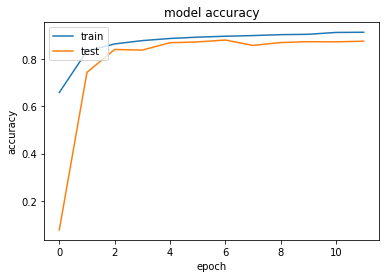

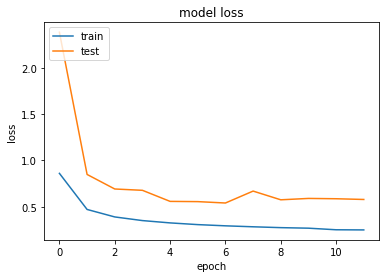

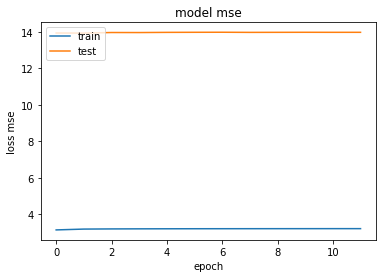

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('loss mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## appliqués au dataset ptbdb

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())

# oversampling
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)
y_oversampled.value_counts()

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
inputs = Input(shape = X_train.shape[1], name = "Input")
dense1 = Dense(units = 10, activation = "tanh", name = "dense1", kernel_initializer="normal")
dense2 = Dense(units = 8, activation = "tanh", name = "dense2", kernel_initializer="normal")
dense3 = Dense(units = 6, activation = "tanh", name = "dense3", kernel_initializer="normal")
dense4 = Dense(units = 2, activation = "softmax", name = "dense4", kernel_initializer="normal")

x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')

In [ ]:
histo_dense = model.fit(X_sm, y_sm, epochs=30)

# CONV_Net

## conv net apppliqué aux dataset mitbih

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_sm =scaler.fit_transform(X_sm)
X_test = scaler.transform(X_test)

In [ ]:

y_sm = to_categorical(y_sm)
y_test = to_categorical(y_test)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train_cnn.shape, y_sm.shape, X_test_cnn.shape, y_test.shape)


(339360, 187, 1) (339360, 5) (27362, 187, 1) (27362, 5)


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
batch_size=32
verbose=1
epochs = 50

In [ ]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 5, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenet = Model(inputs = inputs, outputs = outputs)
model_lenet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_1 = model_lenet.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, mse, accuracy = model_lenet.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50
8484/8484 [==============================] - 40s 4ms/step - loss: 0.2023 - mse: 0.0213 - accuracy: 0.9276 - val_loss: 0.0945 - val_mse: 0.0082 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 34s 4ms/step - loss: 0.0813 - mse: 0.0085 - accuracy: 0.9720 - val_loss: 0.0389 - val_mse: 0.0038 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 34s 4ms/step - loss: 0.0569 - mse: 0.0060 - accuracy: 0.9805 - val_loss: 0.0191 - val_mse: 0.0019 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 35s 4ms/step - loss: 0.0473 - mse: 0.0050 - accuracy: 0.9838 - val_loss: 0.0157 - val_mse: 0.0015 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 35s 4ms/step - loss: 0.0393 - mse: 0.0041 - accuracy: 0.9866 - val_loss: 0.0181 - val_mse: 0.0016 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 6/50
8481/8484 [============================

In [ ]:
mse, accuracy


(0.010936500504612923, 0.964512825012207)

In [ ]:
pred_class_1 = model_lenet.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        21988  365   112  217    35
1           86  600    10    3     2
2           49    6  1668   25     6
3           10    2    15  167     0
4           17    4     7    0  1968
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      0.97      0.98      0.97      0.93     22717
          1       0.61      0.86      0.99      0.72      0.92      0.83       701
          2       0.92      0.95      0.99      0.94      0.97      0.94      1754
          3       0.41      0.86      0.99      0.55      0.92      0.84       194
          4       0.98      0.99      1.00      0.98      0.99      0.98      1996

avg / total       0.97      0.96      0.97      0.97      0.97      0.94     27362



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


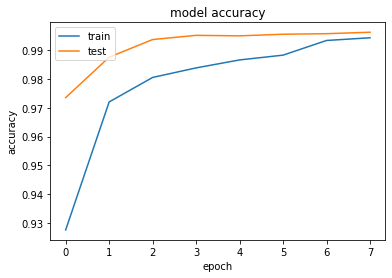

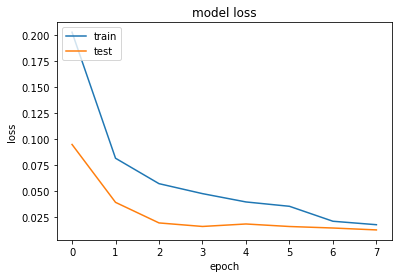

In [ ]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## conv net apppliqué aux dataset ptbdb

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())

# oversampling
smote=SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

1.0    7873
0.0    3041
Name: 187, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
scaler = StandardScaler()
X_sm =scaler.fit_transform(X_sm)
X_test = scaler.transform(X_test)

In [ ]:
y_sm = to_categorical(y_sm)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
inputs = Input(shape = (X_sm.shape[1],1), name = "Input")
conv1_lenet = Conv1D(filters = 32, kernel_size = 5, padding = "valid", activation = "relu")
pool1_lenet = MaxPooling1D(pool_size = 2)
conv2_lenet = Conv1D(filters = 16, kernel_size = 3, padding = "valid", activation = "relu")
pool2_lenet = MaxPooling1D(pool_size = 2)
dropout_lenet = Dropout(rate=0.2)
flatten_lenet = Flatten()
dense1_lenet = Dense(units = 128, activation="relu")
dense2_lenet = Dense(units = 2, activation="softmax")

x = conv1_lenet(inputs)
x = pool1_lenet(x)
x = conv2_lenet(x)
x = pool2_lenet(x)
x = dropout_lenet(x)
x = flatten_lenet(x)
x = dense1_lenet(x)
outputs = dense2_lenet(x)


model_lenpt = Model(inputs = inputs, outputs = outputs)
model_lenpt.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_ptb = model_lenpt.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=32,validation_split = 0.2, verbose=1)
_, mse, accuracy = model_lenpt.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50
394/394 [==============================] - 13s 29ms/step - loss: 0.3805 - mse: 0.1250 - accuracy: 0.8284 - val_loss: 0.4261 - val_mse: 0.1212 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 2/50
394/394 [==============================] - 2s 5ms/step - loss: 0.2181 - mse: 0.0644 - accuracy: 0.9161 - val_loss: 0.1468 - val_mse: 0.0340 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 3/50
394/394 [==============================] - 2s 5ms/step - loss: 0.1577 - mse: 0.0455 - accuracy: 0.9393 - val_loss: 0.1005 - val_mse: 0.0230 - val_accuracy: 0.9692 - lr: 0.0010
Epoch 4/50
394/394 [==============================] - 2s 5ms/step - loss: 0.1239 - mse: 0.0352 - accuracy: 0.9532 - val_loss: 0.1022 - val_mse: 0.0209 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 5/50
394/394 [==============================] - 2s 5ms/step - loss: 0.0971 - mse: 0.0269 - accuracy: 0.9651 - val_loss: 0.0790 - val_mse: 0.0169 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 6/50
394/394 [==============================] - 2s 5ms/st

In [ ]:
print('mse et accuracy:', mse, accuracy)

pred_class_9 = model_lenpt.predict(X_test).argmax(axis = 1)
rounded_labels_9=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_9, pred_class_9, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_9, pred_class_9))


mse et accuracy: 0.012090055271983147 0.984606921672821
114/114 [==============================] - 0s 2ms/step
predict    0     1
reel              
0        986    19
1         37  2596
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.98      0.99      0.97      0.98      0.97      1005
          1       0.99      0.99      0.98      0.99      0.98      0.97      2633

avg / total       0.98      0.98      0.98      0.98      0.98      0.97      3638



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


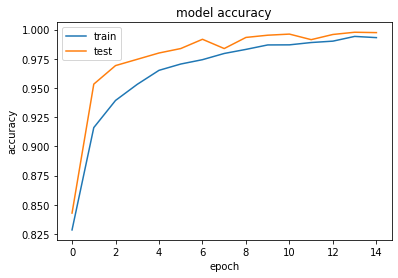

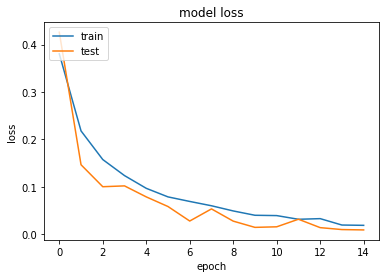

In [ ]:
print(history_ptb.history.keys())
# summarize history for accuracy
plt.plot(history_ptb.history['accuracy'])
plt.plot(history_ptb.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_ptb.history['loss'])
plt.plot(history_ptb.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Réseau de Neurones Convolutifs

## appliqué au dataset mitibih

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_test.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/mitbih_train.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization, SpatialDropout1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_sm =scaler.fit_transform(X_sm)
X_test = scaler.transform(X_test)

In [ ]:
y_sm = to_categorical(y_sm)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train_cnn.shape, y_sm.shape, X_test_cnn.shape, y_test.shape)


(339360, 187, 1) (339360, 5) (27362, 187, 1) (27362, 5)


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model1 = Sequential()
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model1.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(125, activation='relu'))
model1.add(Dense(n_outputs, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_1 = model1.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mse, accuracy = model1.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 76s 9ms/step - loss: 0.1975 - mse: 0.0205 - accuracy: 0.9310 - val_loss: 0.0984 - val_mse: 0.0092 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 69s 8ms/step - loss: 0.0908 - mse: 0.0094 - accuracy: 0.9693 - val_loss: 0.1541 - val_mse: 0.0146 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 71s 8ms/step - loss: 0.0618 - mse: 0.0063 - accuracy: 0.9797 - val_loss: 0.0727 - val_mse: 0.0068 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 69s 8ms/step - loss: 0.0484 - mse: 0.0050 - accuracy: 0.9837 - val_loss: 0.0764 - val_mse: 0.0072 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 69s 8ms/step - loss: 0.0403 - mse: 0.0041 - accuracy: 0.9869 - val_loss: 0.0580 - val_mse: 0.0057 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 6/50
8484/8484 [============================

In [ ]:
print('mse et accuracy:', mse, accuracy)

pred_class_1 = model1.predict(X_test).argmax(axis = 1)
rounded_labels_1=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_1, pred_class_1, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_1, pred_class_1))

mse et accuracy: 0.006292362231761217 0.9816899299621582
856/856 [==============================] - 3s 3ms/step
predict      0    1     2    3     4
reel                                
0        22489  107    66   32    23
1           99  593     9    0     0
2           51    7  1681   13     2
3           18    0    23  153     0
4           41    0    10    0  1945
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.96      0.99      0.97      0.95     22717
          1       0.84      0.85      1.00      0.84      0.92      0.83       701
          2       0.94      0.96      1.00      0.95      0.98      0.95      1754
          3       0.77      0.79      1.00      0.78      0.89      0.77       194
          4       0.99      0.97      1.00      0.98      0.99      0.97      1996

avg / total       0.98      0.98      0.96      0.98      0.97      0.95     27362



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


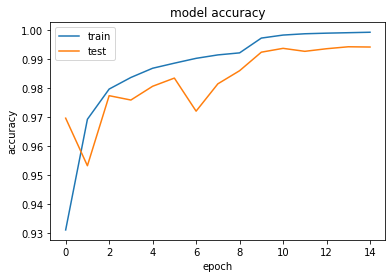

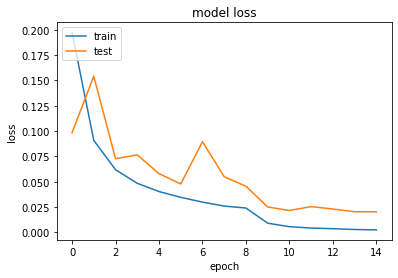

In [ ]:
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=(n_timesteps,n_features)))
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model2.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(125, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_2 = model2.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mse, accuracy = model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 75s 9ms/step - loss: 0.1994 - mse: 0.0206 - accuracy: 0.9309 - val_loss: 0.2201 - val_mse: 0.0204 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 71s 8ms/step - loss: 0.0874 - mse: 0.0091 - accuracy: 0.9701 - val_loss: 0.1602 - val_mse: 0.0147 - val_accuracy: 0.9512 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 70s 8ms/step - loss: 0.0594 - mse: 0.0061 - accuracy: 0.9799 - val_loss: 0.1008 - val_mse: 0.0097 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 67s 8ms/step - loss: 0.0456 - mse: 0.0047 - accuracy: 0.9850 - val_loss: 0.0787 - val_mse: 0.0078 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 69s 8ms/step - loss: 0.0381 - mse: 0.0038 - accuracy: 0.9876 - val_loss: 0.0892 - val_mse: 0.0081 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 6/50
8484/8484 [============================

In [ ]:
print('mse et accuracy:', mse, accuracy)

pred_class_2 = model2.predict(X_test).argmax(axis = 1)
rounded_labels_2=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_2, pred_class_2, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_2, pred_class_2))

mse et accuracy: 0.006465073209255934 0.9803011417388916
856/856 [==============================] - 4s 5ms/step
predict      0    1     2    3     4
reel                                
0        22422  176    55   33    31
1           79  613     7    2     0
2           54   14  1667   14     5
3           17    1    19  157     0
4           22    1     8    1  1964
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.96      0.99      0.97      0.95     22717
          1       0.76      0.87      0.99      0.81      0.93      0.86       701
          2       0.95      0.95      1.00      0.95      0.97      0.94      1754
          3       0.76      0.81      1.00      0.78      0.90      0.79       194
          4       0.98      0.98      1.00      0.98      0.99      0.98      1996

avg / total       0.98      0.98      0.97      0.98      0.97      0.95     27362



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


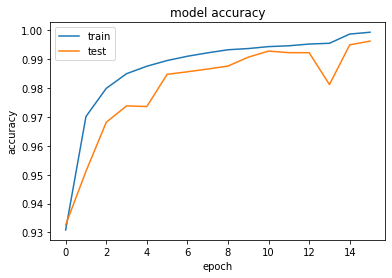

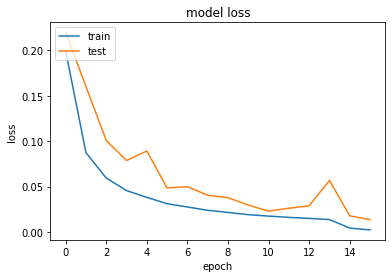

In [ ]:
print(history_2.history.keys())
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model3.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(125, activation='relu'))
model3.add(Dense(n_outputs, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_3 = model3.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mse, accuracy = model3.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 60s 7ms/step - loss: 0.1453 - mse: 0.0150 - accuracy: 0.9502 - val_loss: 0.0908 - val_mse: 0.0087 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 56s 7ms/step - loss: 0.0570 - mse: 0.0058 - accuracy: 0.9811 - val_loss: 0.1203 - val_mse: 0.0113 - val_accuracy: 0.9634 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 56s 7ms/step - loss: 0.0392 - mse: 0.0040 - accuracy: 0.9869 - val_loss: 0.0289 - val_mse: 0.0025 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 51s 6ms/step - loss: 0.0300 - mse: 0.0031 - accuracy: 0.9902 - val_loss: 0.0686 - val_mse: 0.0064 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 51s 6ms/step - loss: 0.0248 - mse: 0.0025 - accuracy: 0.9919 - val_loss: 0.0444 - val_mse: 0.0043 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 6/50
8476/8484 [============================

In [ ]:
print('mse et accuracy:', mse, accuracy)

pred_class_3 = model3.predict(X_test).argmax(axis = 1)
rounded_labels_3=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_3, pred_class_3, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_3, pred_class_3))

mse et accuracy: 0.005467505194246769 0.9838827848434448
856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        22548   88    42   27    12
1          105  584    12    0     0
2           53    6  1679   13     3
3           18    1    23  152     0
4           32    2     4    0  1958
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.96      0.99      0.97      0.95     22717
          1       0.86      0.83      1.00      0.85      0.91      0.82       701
          2       0.95      0.96      1.00      0.96      0.98      0.95      1754
          3       0.79      0.78      1.00      0.79      0.88      0.77       194
          4       0.99      0.98      1.00      0.99      0.99      0.98      1996

avg / total       0.98      0.98      0.96      0.98      0.97      0.95     27362



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


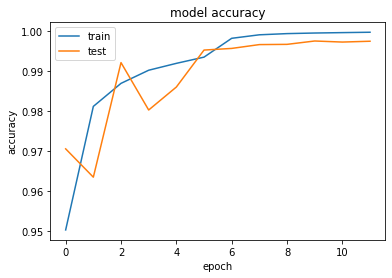

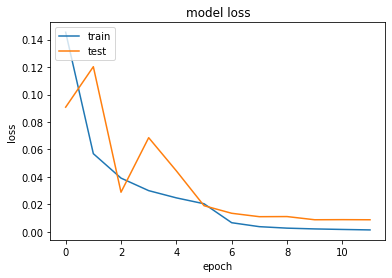

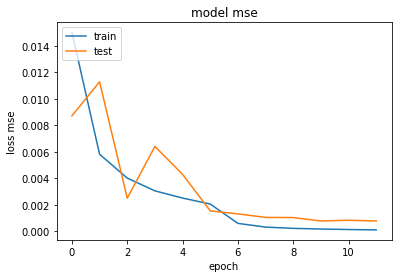

In [ ]:
print(history_3.history.keys())
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['mse'])
plt.plot(history_3.history['val_mse'])
plt.title('model mse')
plt.ylabel('loss mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 20,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model4 = Sequential()
model4.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model4.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model4.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(125, activation='relu'))
model4.add(Dense(n_outputs, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','mse','accuracy'])
history_4 = model4.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)


Epoch 1/50
8484/8484 [==============================] - 55s 6ms/step - loss: 0.1443 - mae: 0.0305 - mse: 0.0149 - accuracy: 0.9499 - val_loss: 0.1665 - val_mae: 0.0247 - val_mse: 0.0159 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 52s 6ms/step - loss: 0.0552 - mae: 0.0114 - mse: 0.0057 - accuracy: 0.9814 - val_loss: 0.1211 - val_mae: 0.0181 - val_mse: 0.0118 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 52s 6ms/step - loss: 0.0388 - mae: 0.0078 - mse: 0.0039 - accuracy: 0.9873 - val_loss: 0.0585 - val_mae: 0.0096 - val_mse: 0.0059 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 52s 6ms/step - loss: 0.0304 - mae: 0.0060 - mse: 0.0031 - accuracy: 0.9902 - val_loss: 0.0581 - val_mae: 0.0084 - val_mse: 0.0054 - val_accuracy: 0.9828 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 57s 7ms/step - loss: 0.0242 - mae: 0.0048 - mse: 0.0025 

In [ ]:
_, mae, mse, accuracy = model4.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

856/856 [==============================] - 3s 4ms/step - loss: 0.1033 - mae: 0.0066 - mse: 0.0053 - accuracy: 0.9849


In [ ]:
print('mae, mse et accuracy:',  mae, mse, accuracy )

pred_class_4 = model4.predict(X_test).argmax(axis = 1)
rounded_labels_4=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_4, pred_class_4, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_4, pred_class_4))

mae, mse et accuracy: 0.006644361186772585 0.005291291978210211 0.984942615032196
856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        22561   75    47   17    17
1          103  589     9    0     0
2           53    4  1686    8     3
3           21    0    21  152     0
4           24    2     8    0  1962
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.96      0.99      0.97      0.95     22717
          1       0.88      0.84      1.00      0.86      0.92      0.82       701
          2       0.95      0.96      1.00      0.96      0.98      0.95      1754
          3       0.86      0.78      1.00      0.82      0.88      0.77       194
          4       0.99      0.98      1.00      0.99      0.99      0.98      1996

avg / total       0.98      0.98      0.96      0.98      0.97      0.95     27362



dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy', 'lr'])


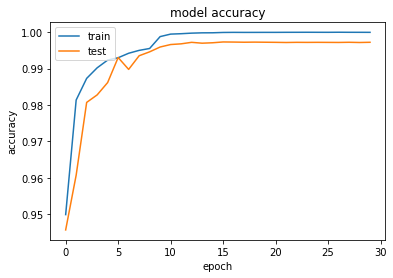

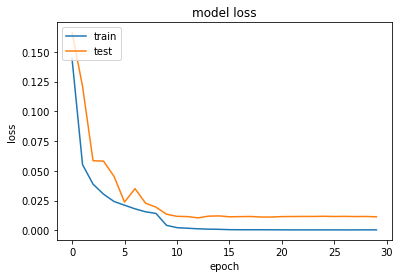

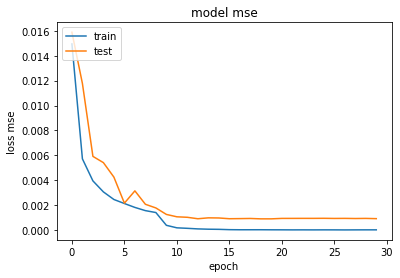

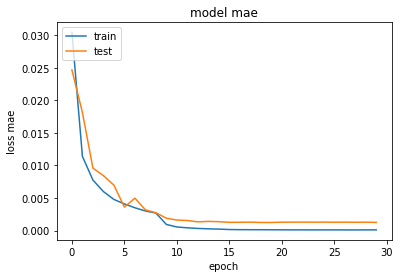

In [ ]:
print(history_4.history.keys())
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['mse'])
plt.plot(history_4.history['val_mse'])
plt.title('model mse')
plt.ylabel('loss mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_4.history['mae'])
plt.plot(history_4.history['val_mae'])
plt.title('model mae')
plt.ylabel('loss mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model5 = Sequential()
model5.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model5.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model5.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(125, activation='relu'))
model5.add(Dense(n_outputs, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','mse','accuracy'])
history_5 = model5.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mae, mse, accuracy = model5.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 46s 5ms/step - loss: 0.1122 - mae: 0.0230 - mse: 0.0115 - accuracy: 0.9619 - val_loss: 0.0540 - val_mae: 0.0091 - val_mse: 0.0050 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 44s 5ms/step - loss: 0.0379 - mae: 0.0076 - mse: 0.0038 - accuracy: 0.9878 - val_loss: 0.0247 - val_mae: 0.0041 - val_mse: 0.0024 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 44s 5ms/step - loss: 0.0253 - mae: 0.0049 - mse: 0.0025 - accuracy: 0.9920 - val_loss: 0.0284 - val_mae: 0.0044 - val_mse: 0.0026 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 44s 5ms/step - loss: 0.0185 - mae: 0.0035 - mse: 0.0018 - accuracy: 0.9943 - val_loss: 0.0212 - val_mae: 0.0030 - val_mse: 0.0019 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 5/50
8474/8484 [============================>.] - ETA: 0s - loss: 0.0156 - mae: 0.0029 - mse: 0.0015 - acc

In [ ]:
print('mae, mse et accuracy:',  mae, mse, accuracy )

pred_class_5 = model5.predict(X_test).argmax(axis = 1)
rounded_labels_5=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_5, pred_class_5, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_5, pred_class_5))

mae, mse et accuracy: 0.006760654505342245 0.005433205980807543 0.9839558601379395
856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        22578   66    34   16    23
1          130  566     5    0     0
2           65    4  1672    8     5
3           21    0    21  152     0
4           35    0     6    0  1955
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.95      0.99      0.97      0.94     22717
          1       0.89      0.81      1.00      0.85      0.90      0.79       701
          2       0.96      0.95      1.00      0.96      0.98      0.95      1754
          3       0.86      0.78      1.00      0.82      0.88      0.77       194
          4       0.99      0.98      1.00      0.98      0.99      0.98      1996

avg / total       0.98      0.98      0.95      0.98      0.97      0.94     27362



dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy', 'lr'])


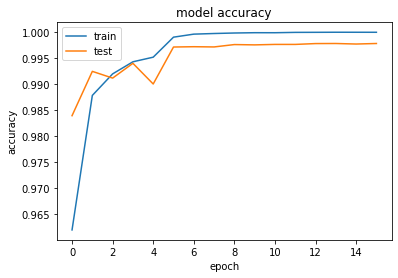

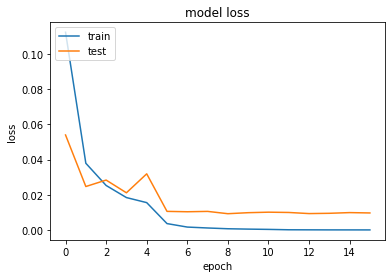

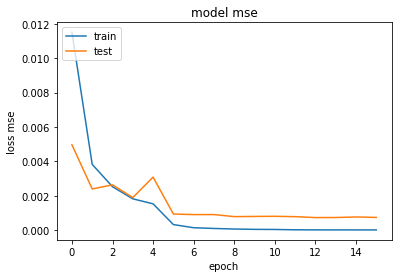

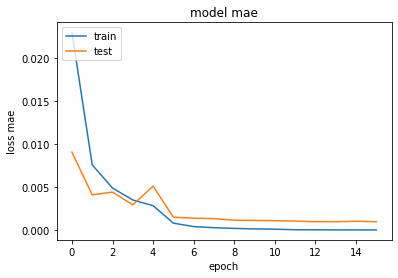

In [ ]:
print(history_5.history.keys())
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['mse'])
plt.plot(history_5.history['val_mse'])
plt.title('model mse')
plt.ylabel('loss mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['mae'])
plt.plot(history_5.history['val_mae'])
plt.title('model mae')
plt.ylabel('loss mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 5,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model6 = Sequential()
model6.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model6.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model6.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling1D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(125, activation='relu'))
model6.add(Dense(n_outputs, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','mse','accuracy'])
history_6 = model6.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mae, mse, accuracy = model6.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 47s 5ms/step - loss: 0.1147 - mae: 0.0237 - mse: 0.0118 - accuracy: 0.9607 - val_loss: 0.1286 - val_mae: 0.0163 - val_mse: 0.0116 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 46s 5ms/step - loss: 0.0393 - mae: 0.0078 - mse: 0.0039 - accuracy: 0.9874 - val_loss: 0.0275 - val_mae: 0.0049 - val_mse: 0.0027 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 46s 5ms/step - loss: 0.0259 - mae: 0.0050 - mse: 0.0026 - accuracy: 0.9917 - val_loss: 0.0203 - val_mae: 0.0034 - val_mse: 0.0019 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 4/50
8484/8484 [==============================] - 45s 5ms/step - loss: 0.0194 - mae: 0.0037 - mse: 0.0019 - accuracy: 0.9938 - val_loss: 0.0328 - val_mae: 0.0049 - val_mse: 0.0030 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 5/50
8478/8484 [============================>.] - ETA: 0s - loss: 0.0152 - mae: 0.0028 - mse: 0.0015 - acc

In [ ]:
print('mae, mse et accuracy:',  mae, mse, accuracy )

pred_class_6 = model6.predict(X_test).argmax(axis = 1)
rounded_labels_6=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_6, pred_class_6, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_6, pred_class_6))

mae, mse et accuracy: 0.0066110012121498585 0.005323414690792561 0.9845040440559387
856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        22577   71    34   17    18
1          118  577     5    1     0
2           60    4  1676   10     4
3           21    1    21  151     0
4           29    3     7    0  1957
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.95      0.99      0.97      0.95     22717
          1       0.88      0.82      1.00      0.85      0.91      0.81       701
          2       0.96      0.96      1.00      0.96      0.98      0.95      1754
          3       0.84      0.78      1.00      0.81      0.88      0.76       194
          4       0.99      0.98      1.00      0.98      0.99      0.98      1996

avg / total       0.98      0.98      0.96      0.98      0.97      0.95     27362



dict_keys(['loss', 'mae', 'mse', 'accuracy', 'val_loss', 'val_mae', 'val_mse', 'val_accuracy', 'lr'])


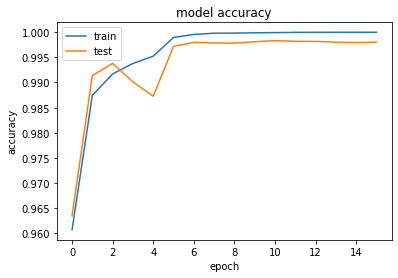

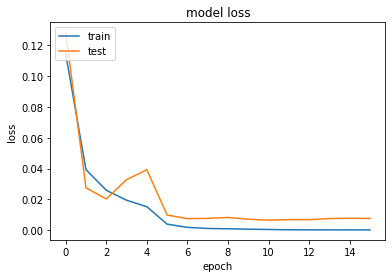

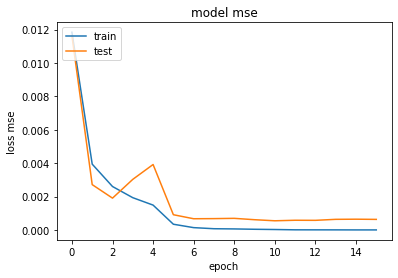

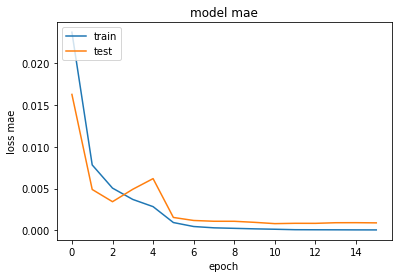

In [ ]:
print(history_6.history.keys())
# summarize history for accuracy
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['mse'])
plt.plot(history_6.history['val_mse'])
plt.title('model mse')
plt.ylabel('loss mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_6.history['mae'])
plt.plot(history_6.history['val_mae'])
plt.title('model mae')
plt.ylabel('loss mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model7 = Sequential()
model7.add(Conv1D(filters=32, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
model7.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model7.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling1D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(125, activation='relu'))
model7.add(Dense(n_outputs, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae','accuracy'])
history_7 = model7.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mae, accuracy= model7.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

Epoch 1/50
8484/8484 [==============================] - 45s 5ms/step - loss: 0.1180 - mae: 0.0243 - accuracy: 0.9599 - val_loss: 0.0331 - val_mae: 0.0058 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 2/50
8484/8484 [==============================] - 48s 6ms/step - loss: 0.0396 - mae: 0.0079 - accuracy: 0.9873 - val_loss: 0.0546 - val_mae: 0.0077 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 3/50
8484/8484 [==============================] - 44s 5ms/step - loss: 0.0261 - mae: 0.0051 - accuracy: 0.9918 - val_loss: 0.0300 - val_mae: 0.0054 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 4/50
8481/8484 [============================>.] - ETA: 0s - loss: 0.0195 - mae: 0.0037 - accuracy: 0.9940
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8484/8484 [==============================] - 45s 5ms/step - loss: 0.0195 - mae: 0.0037 - accuracy: 0.9940 - val_loss: 0.0457 - val_mae: 0.0076 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 5/50
8484/8484 [==============================] - 45s 5m

In [ ]:
print('mae',  mae, accuracy )

pred_class_7 = model7.predict(X_test).argmax(axis = 1)
rounded_labels_7=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_7, pred_class_7, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_7, pred_class_7))

mae 0.007313576992601156 0.9832249283790588
856/856 [==============================] - 2s 2ms/step
predict      0    1     2    3     4
reel                                
0        22558   93    27   23    16
1          116  581     2    2     0
2           72    8  1658   12     4
3           21    0    22  151     0
4           34    5     2    0  1955
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.95      0.99      0.97      0.95     22717
          1       0.85      0.83      1.00      0.84      0.91      0.81       701
          2       0.97      0.95      1.00      0.96      0.97      0.94      1754
          3       0.80      0.78      1.00      0.79      0.88      0.76       194
          4       0.99      0.98      1.00      0.98      0.99      0.98      1996

avg / total       0.98      0.98      0.96      0.98      0.97      0.94     27362



dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy', 'lr'])


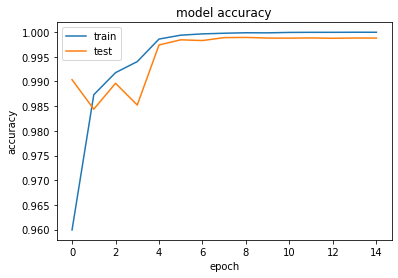

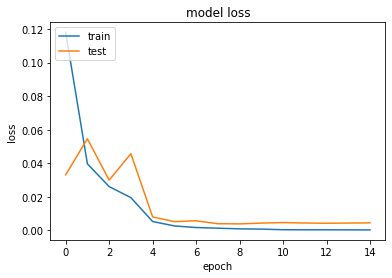

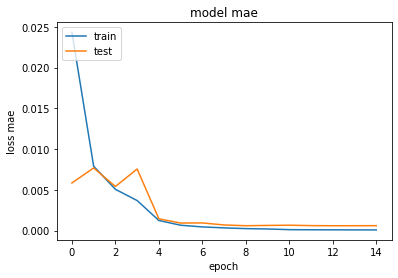

In [ ]:
print(history_7.history.keys())
# summarize history for accuracy
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_7.history['mae'])
plt.plot(history_7.history['val_mae'])
plt.title('model mae')
plt.ylabel('loss mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## appliqué au dataset ptbdb

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_normal.csv',header=None)
df2=pd.read_csv('/content/drive/MyDrive/heart_peak/ptbdb_abnormal.csv',header=None)


df=pd.concat([df1,df2],ignore_index=True,sort=False)
df.isnull().sum().sum()

0

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(y_train.value_counts())

# oversampling
smote=SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

1.0    7873
0.0    3041
Name: 187, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
scaler = StandardScaler()
X_sm =scaler.fit_transform(X_sm)
X_test = scaler.transform(X_test)

In [ ]:
y_sm = to_categorical(y_sm)

In [ ]:
y_sm = to_categorical(y_sm)
y_test = to_categorical(y_test)

In [ ]:
y_sm = to_categorical(y_sm)
y_test = to_categorical(y_test)
X_train_cnn = np.reshape(X_sm, (X_sm.shape[0], X_sm.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0.01,
                    patience = 10,
                    verbose = 1,
                    mode = 'min',
                    restore_best_weights = True)

reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_loss',
                        min_delta = 0.01,
                        patience = 3,
                        factor = 0.1, 
                        cooldown = 4,
                        verbose = 1)

In [ ]:
verbose, epochs, batch_size = 1, 50 , 32
n_timesteps, n_features, n_outputs =  X_train_cnn.shape[1],X_train_cnn.shape[2], y_sm.shape[1]
model_11 = Sequential()
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model_11.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(MaxPooling1D(pool_size=2))
model_11.add(Flatten())
model_11.add(Dense(100, activation='relu'))
model_11.add(Dense(n_outputs, activation='softmax'))
model_11.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['mse', 'accuracy'])
history_11=model_11.fit(X_sm, y_sm, epochs=epochs,callbacks=[early_stopping, reduce_learning_rate], batch_size=batch_size,validation_split = 0.2, verbose=verbose)
_, mse, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/50
394/394 [==============================] - 3s 6ms/step - loss: 0.3079 - mse: 0.0967 - accuracy: 0.8712 - val_loss: 0.3245 - val_mse: 0.0824 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 2/50
394/394 [==============================] - 2s 6ms/step - loss: 0.1497 - mse: 0.0429 - accuracy: 0.9445 - val_loss: 0.1358 - val_mse: 0.0290 - val_accuracy: 0.9632 - lr: 0.0010
Epoch 3/50
394/394 [==============================] - 2s 5ms/step - loss: 0.1037 - mse: 0.0294 - accuracy: 0.9629 - val_loss: 0.0532 - val_mse: 0.0066 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 4/50
394/394 [==============================] - 2s 5ms/step - loss: 0.0706 - mse: 0.0192 - accuracy: 0.9761 - val_loss: 0.0661 - val_mse: 0.0117 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 5/50
394/394 [==============================] - 2s 5ms/step - loss: 0.0519 - mse: 0.0149 - accuracy: 0.9809 - val_loss: 0.0776 - val_mse: 0.0186 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 6/50
394/394 [==============================] - 2s 5ms/step

In [ ]:
print('mse, accuracy',  mse, accuracy )

pred_class_11 = model_11.predict(X_test).argmax(axis = 1)
rounded_labels_11=np.argmax(y_test, axis=1)
print(pd.crosstab(rounded_labels_11, pred_class_11, rownames = ["reel"], colnames = ["predict"]))
print(classification_report_imbalanced(rounded_labels_11, pred_class_11))

mse, accuracy 0.012920972891151905 0.9840571880340576
114/114 [==============================] - 0s 2ms/step
predict    0     1
reel              
0        976    29
1         12  2621
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      1.00      0.98      0.98      0.96      1005
          1       0.99      1.00      0.97      0.99      0.98      0.97      2633

avg / total       0.99      0.99      0.98      0.99      0.98      0.97      3638



dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy', 'lr'])


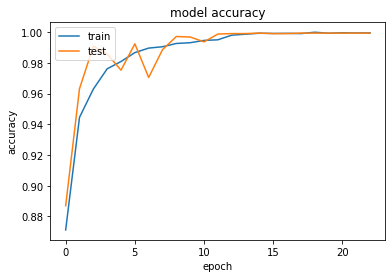

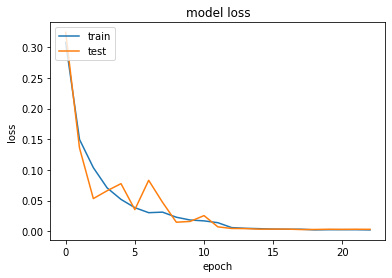

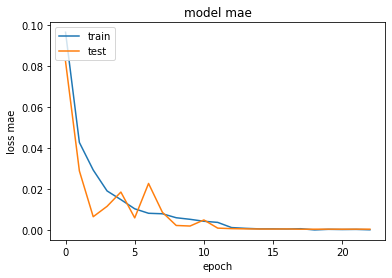

In [ ]:
print(history_11.history.keys())
# summarize history for accuracy
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_11.history['mse'])
plt.plot(history_11.history['val_mse'])
plt.title('model mae')
plt.ylabel('loss mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()